# Task -1:
Importing the Libraries needed for the preprocessing of the texts in the assignment. We'll be requiring spaCy for using NLP based functions for processing and modelling the text. We will be requiring the Regex library (re) for the pre-processing related task such as to remove all characters except for alphanumerics and whitespaces. We'll be requiring Pandas to load the dataset and perform the needed pre-processing

In [1]:
import spacy
import re
import pandas as pd

In this step, we are displaying the data obtain from all the CSV files provided to us, we store the data obtained from docs.csv in a Dataframe named df, the data obtained from queries.csv in queries and the data from qdrel.csv as qdrel. 

In [2]:
df = pd.read_csv("./Query_Doc/docs.csv")
queries = pd.read_csv("./Query_Doc/queries.csv")
qdrel = pd.read_csv("./Query_Doc/qdrel.csv")

print("\033[1m" + "Docs Data Frame: \n" + '\033[0m\n', df.head())
print("\033[1m" + "Queries Data Frame: \n" + '\033[0m\n', queries.head())
print("\033[1m" + "Relational Data Frame: \n" + '\033[0m\n', qdrel.head())

Docs Data Frame: 

    Unnamed: 0  doc_id                                           doc_text
0           0       1  What is the step by step guide to invest in sh...
1           1       2  What is the step by step guide to invest in sh...
2           2       3  What is the story of Kohinoor (Koh-i-Noor) Dia...
3           3       4  What would happen if the Indian government sto...
4           4       5  How can I increase the speed of my internet co...
Queries Data Frame: 

    Unnamed: 0  query_id                                         query_text
0           0      4584                How can ask questions using photos?
1           1      6588  What is Atal Pension Yojana? What are its bene...
2           2     10113      Where is starch digested? How is it digested?
3           3      7957      What is a conjecture? What are some examples?
4           4      5498  What can India do to support the people suffer...
Relational Data Frame: 

    Unnamed: 0  query_id  doc_id
0          

Now we realise that there is an unnecessary column named unnamed, we seek to remove that to filter out noise from the data set because it is **NOT** needed in the modelling process 

In [3]:
df = df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)], axis=1)
queries = queries.drop(queries.columns[queries.columns.str.contains('Unnamed', case=False)], axis=1)
qdrel = qdrel.drop(qdrel.columns[qdrel.columns.str.contains('Unnamed', case=False)], axis=1)

print("\033[1m" + "Docs Data Frame: \n" + '\033[0m\n', df.head())
print("\033[1m" + "Queries Data Frame: \n" + '\033[0m\n', queries.head())
print("\033[1m" + "Relational Data Frame: \n" + '\033[0m\n', qdrel.head())

Docs Data Frame: 

    doc_id                                           doc_text
0       1  What is the step by step guide to invest in sh...
1       2  What is the step by step guide to invest in sh...
2       3  What is the story of Kohinoor (Koh-i-Noor) Dia...
3       4  What would happen if the Indian government sto...
4       5  How can I increase the speed of my internet co...
Queries Data Frame: 

    query_id                                         query_text
0      4584                How can ask questions using photos?
1      6588  What is Atal Pension Yojana? What are its bene...
2     10113      Where is starch digested? How is it digested?
3      7957      What is a conjecture? What are some examples?
4      5498  What can India do to support the people suffer...
Relational Data Frame: 

    query_id  doc_id
0       318     317
1       378     377
2       379     380
3       399    2606
4       399    2607


## a) Preprocessing of the docs and queries - removing the characters other than alphanumerics or whitespaces

Now the first sub task under task-1 expects us to remove all the characters other than alphanumerics and white spaces, we will be using regex for the same. The library used is re, which we had already imported. All we have to do is write a purify_docs function that takes in the data from each of the cell of the docs and queries dataframes as input and then apply the regex operation of filtering out the characters other than lower-case a-z, upper-case A-Z, digits from 0-9 and spaces.

In [4]:
def purify_docs(data):
    purified_doc = re.sub(r'[^A-Za-z0-9]+|\s+', ' ', data)
    return purified_doc

df['pure'] = (df['doc_text']).apply(purify_docs)
queries['pure'] = (queries['query_text']).apply(purify_docs)

print("\033[1m" + "Docs Data Frame: \n" + '\033[0m\n', df.head(), "\n")
print("\033[1m" + "Queries Data Frame: \n" + '\033[0m\n', queries.head(), "\n")

Docs Data Frame: 

    doc_id                                           doc_text  \
0       1  What is the step by step guide to invest in sh...   
1       2  What is the step by step guide to invest in sh...   
2       3  What is the story of Kohinoor (Koh-i-Noor) Dia...   
3       4  What would happen if the Indian government sto...   
4       5  How can I increase the speed of my internet co...   

                                                pure  
0  What is the step by step guide to invest in sh...  
1  What is the step by step guide to invest in sh...  
2  What is the story of Kohinoor Koh i Noor Diamond   
3  What would happen if the Indian government sto...  
4  How can I increase the speed of my internet co...   

Queries Data Frame: 

    query_id                                         query_text  \
0      4584                How can ask questions using photos?   
1      6588  What is Atal Pension Yojana? What are its bene...   
2     10113      Where is starch digested?

## b) Now we need to correct the spellings in both queries and documents. 
For each query, which got corrected, we need to display the original and the corrected query on two spearate lines

In [5]:
# Correct Spellings function ->
from spellchecker import SpellChecker
 
spell = SpellChecker()

nlp = spacy.load("en_core_web_sm")

corrections = {}
def correctSpellings(sentence):
    doc = nlp(sentence)
    newList = []
    flag = 0
    for token in doc:
        if token.pos_ == 'PROPN' or token.ent_type_ != '':
            newList.append(token.text)
            continue
        else:
            misspelt = spell.unknown([token.text])
            if misspelt != set():
                newList.append(str(spell.correction(token.text)))
                flag = 1
            else:
                newList.append(token.text)
    if(flag):
        corrections[sentence] = ' '.join(newList)   
    return newList

def makeSentence(listOfWords):
    return ' '.join(listOfWords)

queries['correctList'] = queries['pure'].apply(correctSpellings)
queries['correctSentence'] = queries['correctList'].apply(makeSentence)

for key, value in corrections.items():
    print(f"\033[1mOriginal:\033[0m {key}\n\033[1mCorrection:\033[0m {value}\n")

Original: Kindly tell me whole process of admission at vits Vellore for biotech i m a bio student in 12 I don t have math there 
Correction: Kindly tell me whole process of admission at its Vellore for biotech i m a bio student in 12 I don t have math there

Original: How much equity should I get as CTO co founder 
Correction: How much equity should I get as CTO to founder

Original: What are the effects of demonitization of 500 and 1000 rupees notes on real estate sector 
Correction: What are the effects of demonetization of 500 and 1000 rupees notes on real estate sector

Original: What is the G len movement 
Correction: What is the G let movement

Original: How do you feel when someone upvotes your answer on Quora 
Correction: How do you feel when someone votes your answer on Quora

Original: Who are some famous people with low IQs 
Correction: Who are some famous people with low is

Original: Which microcontrollers are generally used in the robotics industry 
Correction: Which None

## c) Now we shall tokenize the words in the documents using spaCy library. 
Also as mentioned in the problem statement we need to remove all words that occur in less than 5 documents or more than 85% of the documents : this forms the vocabulary for the task. Lastly for each document and query, we create the create TF-IDF vectors for obtianing the cosine-similarity scores and further processing.

In [6]:
# First of all we need to load the NLP spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Next in order to tokenize the words into a list, we use the mentioned below function for dividing the words into tokens, for each cell of the dataframe a list is returned
def derive_tokens(sentence):
    doc = nlp(sentence)
    tokensList = []
    
    for token in doc:
        word = token.text
        tokensList.append(word)
        
    return tokensList

df['tokensList'] = df['pure'].apply(derive_tokens)
queries['tokensList'] = queries['pure'].apply(derive_tokens)

In [ ]:
import random

def generate_random_position(size, exclude=[]):
    position = (random.randint(0, size-1), random.randint(0, size-1))
    while position in exclude:
        position = (random.randint(0, size-1), random.randint(0, size-1))
    return position

def move_agent(agent_position, direction, size):
    x, y = agent_position
    if direction == 'up':
        x -= 1
    elif direction == 'down':
        x += 1
    elif direction == 'left':
        y -= 1
    elif direction == 'right':
        y += 1

    if 0 <= x < size and 0 <= y < size:
        return (x, y)
    return agent_position

def check_encounter(agent_position, wumpus_position, gold_position, pit_positions):
    if agent_position == wumpus_position:
        return "You were eaten by the Wumpus!"
    elif agent_position == gold_position:
        return "You found the gold!"
    elif agent_position in pit_positions:
        return "You fell into a pit!"
    return ""

def shoot_arrow(agent_position, wumpus_position, direction):
    if direction == 'up' and agent_position[0] > wumpus_position[0] and agent_position[1] == wumpus_position[1]:
        return "You killed the Wumpus!"
    elif direction == 'down' and agent_position[0] < wumpus_position[0] and agent_position[1] == wumpus_position[1]:
        return "You killed the Wumpus!"
    elif direction == 'left' and agent_position[1] > wumpus_position[1] and agent_position[0] == wumpus_position[0]:
        return "You killed the Wumpus!"
    elif direction == 'right' and agent_position[1] < wumpus_position[1] and agent_position[0] == wumpus_position[0]:
        return "You killed the Wumpus!"
    else:
        return "You missed the Wumpus!"

def print_state(agent_position, wumpus_position, gold_position, pit_positions, agent_alive, has_gold, has_arrow):
    print("Agent Position:", agent_position)
    print("Wumpus Position:", wumpus_position)
    print("Gold Position:", gold_position)
    print("Pit Positions:", pit_positions)
    print("Agent Alive:", agent_alive)
    print("Has Gold:", has_gold)
    print("Has Arrow:", has_arrow)

def play_wumpus_world(size=4):
    agent_position = (0, 0)
    wumpus_position = generate_random_position(size)
    gold_position = generate_random_position(size, exclude=[wumpus_position])
    pit_positions = [generate_random_position(size, exclude=[wumpus_position, gold_position]) for _ in range(size)]
    agent_alive = True
    has_gold = False
    has_arrow = True

    print("Welcome to Wumpus World!")
    print_state(agent_position, wumpus_position, gold_position, pit_positions, agent_alive, has_gold, has_arrow)

    while agent_alive and not has_gold:
        action = input("Enter action (move/shoot): ")
        if action == 'move':
            direction = input("Enter direction (up/down/left/right): ")
            agent_position = move_agent(agent_position, direction, size)
            print(check_encounter(agent_position, wumpus_position, gold_position, pit_positions))
        elif action == 'shoot' and has_arrow:
            direction = input("Enter direction to shoot (up/down/left/right): ")
            print(shoot_arrow(agent_position, wumpus_position, direction))
            has_arrow = False
        else:
            print("Invalid action!")

        print_state(agent_position, wumpus_position, gold_position, pit_positions, agent_alive, has_gold, has_arrow)

play_wumpus_world()


In [7]:
# Next we shall generate the vocabulary and for that purpose we first need a collection of all tokens used in the docs database
def performFiltrationOfWords(df):
    collectionOfAllWords = []

    for tokens in df['tokensList']:
        for eachToken in tokens:
            collectionOfAllWords.append(eachToken)

    collectionSet = set(collectionOfAllWords)
    mapCollections = {}

    for token in collectionSet:
        mapCollections[token] = collectionOfAllWords.count(token)

    purifiedWords = []
    
    for token in collectionSet:
        if mapCollections[token] >= 5 and mapCollections[token]<= len(df) * 0.85:
            purifiedWords.append(token)
            
    return purifiedWords

filteredWords = performFiltrationOfWords(df)

df['tokensList'] = df['tokensList'].apply(lambda words: [word for word in words if word in filteredWords])
df['sentences'] = df['tokensList'].apply(lambda word: ' '.join(word))
queries['sentences'] = queries['tokensList'].apply(lambda word: ' '.join(word)) 

Next we apply the TFIDF function to the Docs and Queries data-frames post preprocessing, in order to create TFIDF vectors 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidfVectorsForDocs = tfidf.fit_transform(df['sentences'])
# queries['tokens'] = queries['tokens'].apply(lambda tokens: [token for token in tokens if token in filtered_tokens])
tfidfVectorsForQueries = tfidf.transform(queries['sentences'])

## d) Now for each of the queries, we shall perform the Cosine Pairwise Similarity
We will be using the sklearn library for the same to calculate the cosine pairwise similarity and along with that we will also be displaying the top 1, top 5 and top 10 most similar documents sorted according to Cosine Similarity scores for eahc query in the Queries dataframe

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

generateCosineSimilarityMatrix = cosine_similarity(tfidfVectorsForQueries, tfidfVectorsForDocs)

def obtainSimilarDocs(n):
    return generateCosineSimilarityMatrix.argsort(axis=1)[:, -n:][:, ::-1]

def printSimilarDocs(n, documents):
    print(f"\nTop {n} Similar Docs: ")
    for i, indices in enumerate(documents, start=1):
        docText = df.iloc[indices]['doc_text']
        docIndex = df.iloc[indices]['doc_id']
        print(f"Doc ID: {docIndex} : {docText}")
        
# Obtaining the similarity indices and printing them subsequently
topOneSimilarInds = obtainSimilarDocs(1)
topFiveSimilarInds = obtainSimilarDocs(5)
topTenSimilarInds = obtainSimilarDocs(10)

# Running a for loop in order to print all the values:
for i, rows in queries.iterrows():
    query = rows['query_text']
    print(f"\nGiven Query: {query}")
    
    printSimilarDocs(1, topOneSimilarInds[i])
    printSimilarDocs(5, topFiveSimilarInds[i])
    printSimilarDocs(10, topTenSimilarInds[i])


Given Query: How can ask questions using photos?

Top 1 Similar Docs: 
Doc ID: 1377 : What are some of the best photos?

Top 5 Similar Docs: 
Doc ID: 1377 : What are some of the best photos?
Doc ID: 1782 : What are the best interview questions to ask?
Doc ID: 9951 : Is there any way to automatically like Instagram photos with hashtags, using software?
Doc ID: 45 : What are the questions should not ask on Quora?
Doc ID: 4412 : Why do people have to ask Quora for questions?

Top 10 Similar Docs: 
Doc ID: 1377 : What are some of the best photos?
Doc ID: 1782 : What are the best interview questions to ask?
Doc ID: 9951 : Is there any way to automatically like Instagram photos with hashtags, using software?
Doc ID: 45 : What are the questions should not ask on Quora?
Doc ID: 4412 : Why do people have to ask Quora for questions?
Doc ID: 4583 : How do I ask questions with pictures on "Quora"?
Doc ID: 2603 : What are the best questions to ask a girl while chatting?
Doc ID: 9179 : How can I ma

## e) Calculations of Precision@K Scores

In [10]:
def getPScores(n):
    pAtOneSum = 0.0
    pAtFiveSum = 0.0
    pAtTenSum = 0.0
    if n==1:
        for i, rows in queries.iterrows():
            generateSetOfRelations = set(qdrel[qdrel['query_id'] == rows['query_id']]['doc_id'])
            topOneDocs = topOneSimilarInds[i]
            dataAtOne = set()
            for j, indices in enumerate(topOneDocs, start=1):
                dataAtOne.add(df.iloc[indices]['doc_id'])
    
            pAtOne = len(generateSetOfRelations.intersection(dataAtOne)) / 1
            pAtOneSum += pAtOne
            queryLength = len(queries)
        return pAtOneSum/queryLength
    
    if n==5:
        for i, rows in queries.iterrows():
            generateSetOfRelations = set(qdrel[qdrel['query_id'] == rows['query_id']]['doc_id'])
            topFiveDocs = topFiveSimilarInds[i]
            dataAtFive = set()
            for j, indices in enumerate(topFiveDocs, start=1):
                dataAtFive.add(df.iloc[indices]['doc_id'])
    
            pAtFive = len(generateSetOfRelations.intersection(dataAtFive)) / 5
            pAtFiveSum += pAtFive
            queryLength = len(queries)
        return pAtFiveSum/queryLength
    
    if n==10:
        for i, rows in queries.iterrows():
            generateSetOfRelations = set(qdrel[qdrel['query_id'] == rows['query_id']]['doc_id'])
            topTenDocs = topTenSimilarInds[i]
            dataAtTen = set()
            for j, indices in enumerate(topTenDocs, start=1):
                dataAtTen.add(df.iloc[indices]['doc_id'])
    
            pAtTen = len(generateSetOfRelations.intersection(dataAtTen)) / 10
            pAtTenSum += pAtTen
            queryLength = len(queries)
        return pAtTenSum/queryLength
        
pAOne = getPScores(1)
pAFive = getPScores(5)
pATen = getPScores(10)

print(f"The Weighted Avg Precision@1 Score is as follows: {pAOne:.5f}")
print(f"The Weighted Avg Precision@5 Score is as follows: {pAFive:.5f}")
print(f"The Weighted Avg Precision@10 Score is as follows: {pATen:.5f}")

The Weighted Avg Precision@1 Score is as follows: 0.59000
The Weighted Avg Precision@5 Score is as follows: 0.19000
The Weighted Avg Precision@10 Score is as follows: 0.10100


## Task - 2a: Only Stemming :
SpaCy library has no builtin function for spacing, so we shallbe using the NLTK library for Stemming, essentially NLTK has three widely used Stemmers: 

- Porter Stemmer
- Snowball Stemmer
- Lancaster Stemmer

For the purpose of this model we will be using PorterStemmer, we will just creating an instance and then apply them to the words in the pre-processing phase. We have implemented all functions here, let us checkout the resultant Precision Scores at the end 

In [11]:
from nltk.stem import PorterStemmer
st = PorterStemmer() 

def performStemmingAndTokenize(sentence):
    doc = nlp(sentence)
    tokensList = []
    
    for token in doc:
        word = st.stem(token.text)
        tokensList.append(word.lower())
        
    return tokensList

df['stemmedTokens'] = df['pure'].apply(performStemmingAndTokenize)
queries['stemmedTokens'] = queries['pure'].apply(performStemmingAndTokenize)

def performFiltrationOfStemmedWords(df):
    collectionOfAllWords = []

    for tokens in df['stemmedTokens']:
        for eachToken in tokens:
            collectionOfAllWords.append(eachToken)

    collectionSet = set(collectionOfAllWords)
    mapCollections = {}

    for token in collectionSet:
        mapCollections[token] = collectionOfAllWords.count(token)

    purifiedWords = []
    
    for token in collectionSet:
        if mapCollections[token] >= 5 and mapCollections[token]<= len(df) * 0.85:
            purifiedWords.append(token)
            
    return purifiedWords

filteredWords = performFiltrationOfStemmedWords(df)

df['stemmedTokens'] = df['stemmedTokens'].apply(lambda words: [word for word in words if word in filteredWords])
df['stemmedSentences'] = df['stemmedTokens'].apply(lambda word: ' '.join(word))
queries['stemmedSentences'] = queries['stemmedTokens'].apply(lambda word: ' '.join(word)) 

tfidf = TfidfVectorizer()
tfidfVectorsForDocs = tfidf.fit_transform(df['stemmedSentences'])
tfidfVectorsForQueries = tfidf.transform(queries['stemmedSentences'])

generateCosineSimilarityMatrix = cosine_similarity(tfidfVectorsForQueries, tfidfVectorsForDocs)
        
topOneSimilarInds = obtainSimilarDocs(1)
topFiveSimilarInds = obtainSimilarDocs(5)
topTenSimilarInds = obtainSimilarDocs(10)
        
pAOne = getPScores(1)
pAFive = getPScores(5)
pATen = getPScores(10)

print(f"The Weighted Avg Precision@1 Score is as follows: {pAOne:.5f}")
print(f"The Weighted Avg Precision@5 Score is as follows: {pAFive:.5f}")
print(f"The Weighted Avg Precision@10 Score is as follows: {pATen:.5f}")

The Weighted Avg Precision@1 Score is as follows: 0.69000
The Weighted Avg Precision@5 Score is as follows: 0.20000
The Weighted Avg Precision@10 Score is as follows: 0.10900


## Task - 2b: Performing Lemmatization on the Data
Now in this case, before the pre-processing step, we have the builtin function for a Lemmatizer in the standard spaCy NLP Pipeline, therefore we use it to provide only the base words for each of the words present in the data set

In [12]:
nlp = spacy.load("en_core_web_sm")
 

def performLemmatizationAndTokenize(sentence):
    doc = nlp(sentence)
    tokensList = []
    
    for token in doc:
        tokensList.append(token.lemma_.lower())
        
    return tokensList

df['lemmatizedTokens'] = df['pure'].apply(performLemmatizationAndTokenize)
queries['lemmatizedTokens'] = queries['pure'].apply(performLemmatizationAndTokenize)

def performFiltrationOfLemmatizedWords(df):
    collectionOfAllWords = []

    for tokens in df['lemmatizedTokens']:
        for eachToken in tokens:
            collectionOfAllWords.append(eachToken)

    collectionSet = set(collectionOfAllWords)
    mapCollections = {}

    for token in collectionSet:
        mapCollections[token] = collectionOfAllWords.count(token)

    purifiedWords = []
    
    for token in collectionSet:
        if mapCollections[token] >= 5 and mapCollections[token]<= len(df) * 0.85:
            purifiedWords.append(token)
            
    return purifiedWords

filteredWords = performFiltrationOfLemmatizedWords(df)

df['lemmatizedTokens'] = df['lemmatizedTokens'].apply(lambda words: [word for word in words if word in filteredWords])
df['lemmatizedSentences'] = df['lemmatizedTokens'].apply(lambda word: ' '.join(word))
queries['lemmatizedSentences'] = queries['lemmatizedTokens'].apply(lambda word: ' '.join(word)) 

tfidf = TfidfVectorizer()
tfidfVectorsForDocs = tfidf.fit_transform(df['lemmatizedSentences'])
tfidfVectorsForQueries = tfidf.transform(queries['lemmatizedSentences'])

generateCosineSimilarityMatrix = cosine_similarity(tfidfVectorsForQueries, tfidfVectorsForDocs)
        
topOneSimilarInds = obtainSimilarDocs(1)
topFiveSimilarInds = obtainSimilarDocs(5)
topTenSimilarInds = obtainSimilarDocs(10)
        
pAOne = getPScores(1)
pAFive = getPScores(5)
pATen = getPScores(10)

print(f"The Weighted Avg Precision@1 Score is as follows: {pAOne:.5f}")
print(f"The Weighted Avg Precision@5 Score is as follows: {pAFive:.5f}")
print(f"The Weighted Avg Precision@10 Score is as follows: {pATen:.5f}")

The Weighted Avg Precision@1 Score is as follows: 0.71000
The Weighted Avg Precision@5 Score is as follows: 0.19600
The Weighted Avg Precision@10 Score is as follows: 0.10800


## Task - 3: Apply Parts-Of-Speech Tagging and Named Entity Recognition and obtaining the results
In this case, we shall increase the frequency of the important words like the ones which are NOUNS and the ones which are names of entities like an organisation, person's name etc. We shall multiply in a factor of 2 for nouns and 4 for Named Entities

In [108]:
def performPOSAndNER(sentence):
    doc = nlp(sentence)
    
    newTokensList = []
    for token in doc:
        if token.pos_ == 'PROPN':
            newTokensList.extend([token.text.lower()] * 2)
        elif token.ent_type_ in ["GPE", "PERSON", "PRODUCT"]:
            newTokensList.extend([token.text.lower()] * 5)
        else:
            newTokensList.append(token.lemma_.lower())
    
    return ' '.join(newTokensList)

queries['POSTagged'] = queries['lemmatizedSentences'].apply(performPOSAndNER)
df['POSTagged'] = df['lemmatizedSentences'].apply(performPOSAndNER)

tfidf = TfidfVectorizer()
tfidfVectorsForDocs = tfidf.fit_transform(df['POSTagged'])
tfidfVectorsForQueries = tfidf.transform(queries['POSTagged'])

generateCosineSimilarityMatrix = cosine_similarity(tfidfVectorsForQueries, tfidfVectorsForDocs)
        
topOneSimilarInds = obtainSimilarDocs(1)
topFiveSimilarInds = obtainSimilarDocs(5)
topTenSimilarInds = obtainSimilarDocs(10)
        
pAOne = getPScores(1)
pAFive = getPScores(5)
pATen = getPScores(10)

print(f"The Weighted Avg Precision@1 Score is as follows: {pAOne:.5f}")
print(f"The Weighted Avg Precision@5 Score is as follows: {pAFive:.5f}")
print(f"The Weighted Avg Precision@10 Score is as follows: {pATen:.5f}")

The Weighted Avg Precision@1 Score is as follows: 0.69000
The Weighted Avg Precision@5 Score is as follows: 0.18800
The Weighted Avg Precision@10 Score is as follows: 0.10800


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf = TfidfVectorizer()
tfidfVectorsForDocs = tfidf.fit_transform(df['lemmatizedSentences'])
tfidfVectorsForQueries = tfidf.transform(queries['lemmatizedSentences'])

tfidf_tokens = tfidf.get_feature_names_out() 
listOfWords = []

for word in tfidf_tokens:
    listOfWords.append(word)
    

listOfWords = list(nlp.pipe(listOfWords))

for i in range(len(listOfWords)):
    word = listOfWords[i]
    for token in word:     
        if token.pos_ == "PROPN":  
            tfidfVectorsForDocs[:, i]*=2
            tfidfVectorsForQueries[:, i]*=2
        elif token.ent_type_ != '':
            tfidfVectorsForDocs[:, i]*=4
            tfidfVectorsForQueries[:, i]*=4
                   

generateCosineSimilarityMatrix = cosine_similarity(tfidfVectorsForQueries, tfidfVectorsForDocs)
        
topOneSimilarInds = obtainSimilarDocs(1)
topFiveSimilarInds = obtainSimilarDocs(5)
topTenSimilarInds = obtainSimilarDocs(10)
        
pAOne = getPScores(1)
pAFive = getPScores(5)
pATen = getPScores(10)

print(f"The Weighted Avg Precision@1 Score is as follows: {pAOne:.5f}")
print(f"The Weighted Avg Precision@5 Score is as follows: {pAFive:.5f}")
print(f"The Weighted Avg Precision@10 Score is as follows: {pATen:.5f}")

The Weighted Avg Precision@1 Score is as follows: 0.71000
The Weighted Avg Precision@5 Score is as follows: 0.19000
The Weighted Avg Precision@10 Score is as follows: 0.10200


## Task - 4: Changing the Parameters in order to get better results 

**Changes**
- **Rectifying the Vocabulary:** instead of blindly flitering out the words which have frequency less than 5 and more than 85000, we will instead be removing all those words which are not a noun or aren't names of recognised entities and then successively, we'll apply lemmatization and then generate the words, also we note that we'll be using the POS Tagging as described above for words in their respective lower-case

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfidf = TfidfVectorizer()
tfidfVectorsForDocs = tfidf.fit_transform(df['pure'])
tfidfVectorsForQueries = tfidf.transform(queries['pure'])

tfidf_tokens = tfidf.get_feature_names_out() 
listOfWords = []

for word in tfidf_tokens:
    listOfWords.append(word)
    

listOfWords = list(nlp.pipe(listOfWords))

for i in range(len(listOfWords)):
    word = listOfWords[i]
    for token in word:     
        if token.pos_ == "PROPN":  
            tfidfVectorsForDocs[:, i]*=2
            tfidfVectorsForQueries[:, i]*=2
        elif token.ent_type_ != '':
            tfidfVectorsForDocs[:, i]*=4
            tfidfVectorsForQueries[:, i]*=4
                   

generateCosineSimilarityMatrix = cosine_similarity(tfidfVectorsForQueries, tfidfVectorsForDocs)
        
topOneSimilarInds = obtainSimilarDocs(1)
topFiveSimilarInds = obtainSimilarDocs(5)
topTenSimilarInds = obtainSimilarDocs(10)
        
pAOne = getPScores(1)
pAFive = getPScores(5)
pATen = getPScores(10)

print(f"The Weighted Avg Precision@1 Score is as follows: {pAOne:.5f}")
print(f"The Weighted Avg Precision@5 Score is as follows: {pAFive:.5f}")
print(f"The Weighted Avg Precision@10 Score is as follows: {pATen:.5f}")

The Weighted Avg Precision@1 Score is as follows: 0.88000
The Weighted Avg Precision@5 Score is as follows: 0.21200
The Weighted Avg Precision@10 Score is as follows: 0.11000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encoding for the target variable
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the neural network architecture
def initialize_weights(input_dim, hidden_dim, output_dim):
    w1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.zeros((1, hidden_dim))
    w2 = np.random.randn(hidden_dim, output_dim)
    b2 = np.zeros((1, output_dim))
    return w1, b1, w2, b2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_propagation(X, w1, b1, w2, b2):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    return a2

def calculate_accuracy(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_true == y_pred)
    return accuracy

def loss_function(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def neural_network(X, w1, b1, w2, b2):
    return forward_propagation(X, w1, b1, w2, b2)

# PSO parameters
n_particles = 20
max_iter = 100
c1 = 2  # cognitive coefficient
c2 = 2  # social coefficient
w = 0.7  # inertia weight
n_features = X_train.shape[1]
n_hidden = 10
n_classes = y_train.shape[1]

# Initialize particles' positions and velocities
particles_position = []
particles_velocity = []
for _ in range(n_particles):
    w1, b1, w2, b2 = initialize_weights(n_features, n_hidden, n_classes)
    particles_position.append((w1, b1, w2, b2))
    particles_velocity.append([np.random.rand(*w.shape) for w in (w1, b1, w2, b2)])

global_best_position = None
global_best_score = float('inf')

# PSO optimization loop
for iteration in range(max_iter):
    for i, particle_position in enumerate(particles_position):
        w1, b1, w2, b2 = particle_position
        y_pred = neural_network(X_train, w1, b1, w2, b2)
        score = loss_function(y_train, y_pred)
        
        if score < global_best_score:
            global_best_position = particle_position
            global_best_score = score
        
        # Update particle's velocity
        for j in range(len(particles_velocity[i])):
            r1 = np.random.rand(*particles_velocity[i][j].shape)
            r2 = np.random.rand(*particles_velocity[i][j].shape)
            particles_velocity[i][j] = (w * particles_velocity[i][j] +
                                        c1 * r1 * (global_best_position[j] - particle_position[j]) +
                                        c2 * r2 * (particles_position[i][j] - particle_position[j]))
        
        # Update particle's position
        particles_position[i] = [p + v for p, v in zip(particle_position, particles_velocity[i])]

# Evaluate the model with the global best position found
w1, b1, w2, b2 = global_best_position
y_pred_train = neural_network(X_train, w1, b1, w2, b2)
y_pred_test = neural_network(X_test, w1, b1, w2, b2)

train_accuracy = calculate_accuracy(y_train, y_pred_train)
test_accuracy = calculate_accuracy(y_test, y_pred_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.9583333333333334
Test Accuracy: 0.9


/home/shatansh/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


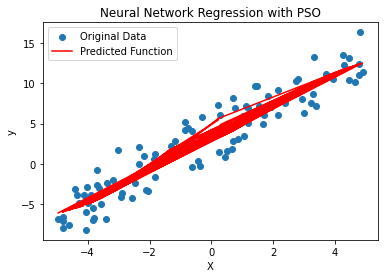

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate custom dataset
np.random.seed(0)
X = np.random.uniform(low=-5, high=5, size=(100, 1))
y = 2 * X + 3 + np.random.normal(scale=2, size=(100, 1))  # y = 2X + 3 + noise

# Define neural network architecture
def initialize_weights(input_dim, hidden_dim, output_dim):
    w1 = np.random.randn(input_dim, hidden_dim)
    b1 = np.zeros((1, hidden_dim))
    w2 = np.random.randn(hidden_dim, output_dim)
    b2 = np.zeros((1, output_dim))
    return w1, b1, w2, b2

def forward_propagation(X, w1, b1, w2, b2):
    z1 = np.dot(X, w1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    return z2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def neural_network(X, w1, b1, w2, b2):
    return forward_propagation(X, w1, b1, w2, b2)

# Particle Swarm Optimization (PSO)
def pso(X, y, n_particles, max_iter, input_dim, hidden_dim, output_dim):
    # PSO parameters
    c1 = 2  # cognitive coefficient
    c2 = 2  # social coefficient
    w = 0.7  # inertia weight
    
    # Initialize particles' positions and velocities
    particles_position = []
    particles_velocity = []
    for _ in range(n_particles):
        w1, b1, w2, b2 = initialize_weights(input_dim, hidden_dim, output_dim)
        particles_position.append((w1, b1, w2, b2))
        particles_velocity.append([np.random.rand(*w.shape) for w in (w1, b1, w2, b2)])
    
    global_best_position = None
    global_best_score = float('inf')
    
    # PSO optimization loop
    for iteration in range(max_iter):
        for i, particle_position in enumerate(particles_position):
            w1, b1, w2, b2 = particle_position
            y_pred = neural_network(X, w1, b1, w2, b2)
            score = mean_squared_error(y, y_pred)
            
            if score < global_best_score:
                global_best_position = particle_position
                global_best_score = score
            
            # Update particle's velocity
            for j in range(len(particles_velocity[i])):
                r1 = np.random.rand(*particles_velocity[i][j].shape)
                r2 = np.random.rand(*particles_velocity[i][j].shape)
                particles_velocity[i][j] = (w * particles_velocity[i][j] +
                                            c1 * r1 * (global_best_position[j] - particle_position[j]) +
                                            c2 * r2 * (particles_position[i][j] - particle_position[j]))
            
            # Update particle's position
            particles_position[i] = [p + v for p, v in zip(particle_position, particles_velocity[i])]
    
    # Return the best solution found
    return global_best_position

# Train the neural network using PSO
input_dim = X.shape[1]
hidden_dim = 10
output_dim = 1
n_particles = 20
max_iter = 100

best_solution = pso(X, y, n_particles, max_iter, input_dim, hidden_dim, output_dim)

# Evaluate the model with the global best position found
w1, b1, w2, b2 = best_solution
y_pred = neural_network(X, w1, b1, w2, b2)

# Plot the original data and the predicted function
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', label='Predicted Function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression with PSO')
plt.legend()
plt.show()


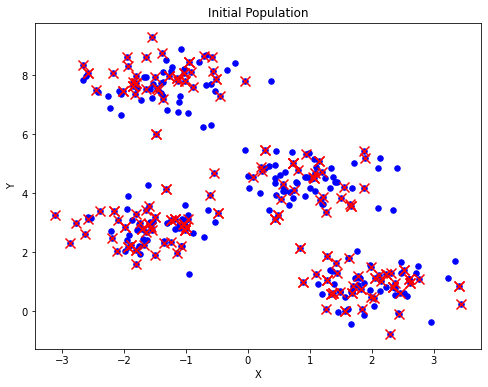

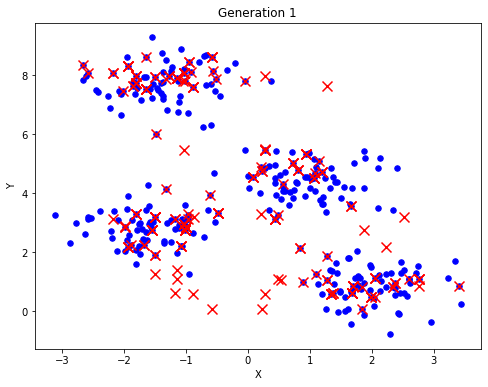

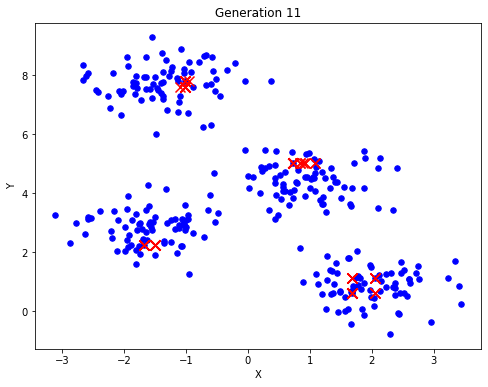

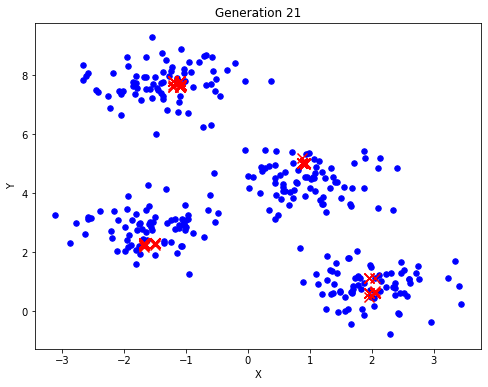

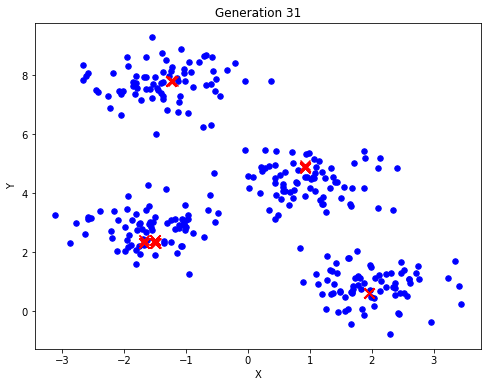

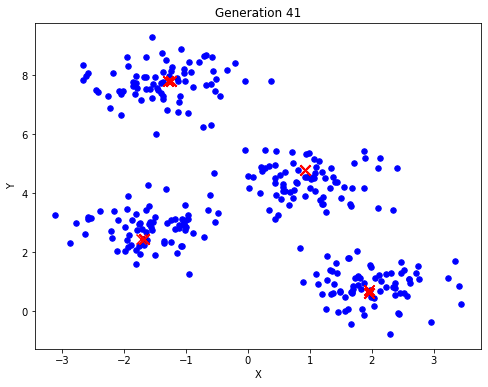

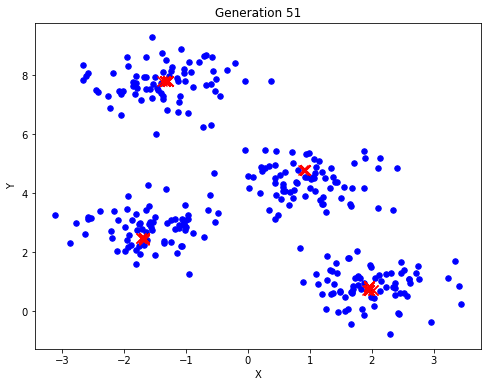

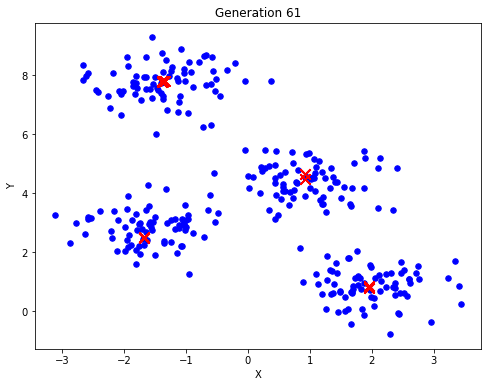

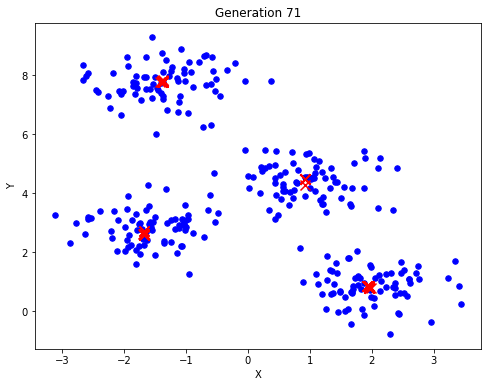

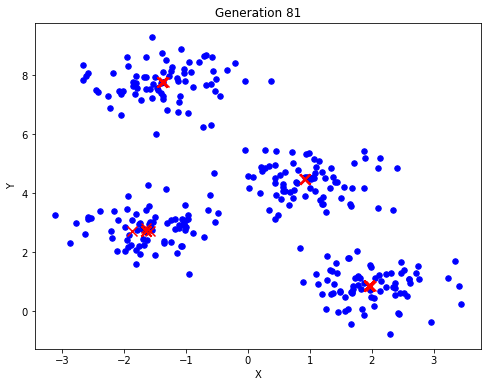

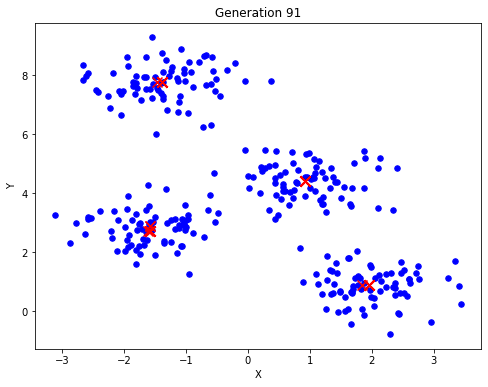

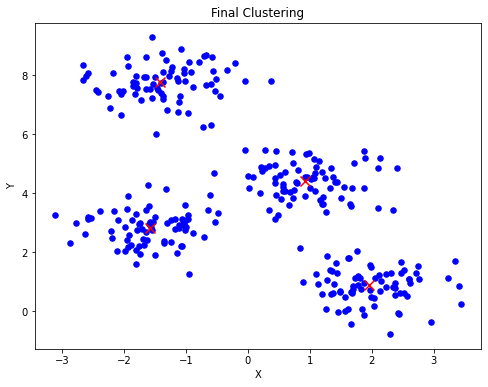

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
import random
import matplotlib.pyplot as plt

def crossover(parent1, parent2):
    crossover_point = np.random.randint(0, len(parent1))
    child = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    return child

def mutate(individual):
    mutation_rate = 0.01
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.normal(scale=0.1)
    return individual

def fitness(X, individual, n_clusters, n_features):
    centroids = individual.reshape(n_clusters, n_features)
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    inertia = sum(np.min(distances, axis=1))
    return inertia

def plot_clusters(X, centroids_list, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c='blue', s=30)
    for centroids in centroids_list:
        centroids = centroids.reshape(n_clusters, n_features)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

# Generating random data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
n_clusters = 4
n_features = X.shape[1]
population_size = 50
generations = 100

population = []

# Initialize population
for _ in range(population_size):
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    population.append(centroids.flatten())

plot_clusters(X, population, title="Initial Population")

for generation in range(generations):
    # Select parents (top 50% of the population based on fitness)
    sorted_population = sorted(population, key=lambda ind: fitness(X, ind, n_clusters, n_features))
    selected_parents = sorted_population[:population_size // 2]

    # Crossover and mutate
    new_population = []
    for _ in range(population_size):
        parent1, parent2 = random.choices(selected_parents, k=2)
        child = crossover(parent1, parent2)
        child = mutate(child)
        new_population.append(child)

    population = new_population

    # Plot clusters and centroids for every 10 generations
    if generation % 10 == 0:
        plot_clusters(X, population, title=f"Generation {generation+1}")

# Find the best solution from the final population
best_solution = min(population, key=lambda ind: fitness(X, ind, n_clusters, n_features))
best_solution = best_solution.reshape(n_clusters, n_features)
plot_clusters(X, [best_solution.flatten()], title="Final Clustering")
